In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [3]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

train_dir = "FER2013/train"
test_dir = "FER2013/test"

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                                label_mode= "categorical",
                                                                batch_size = 32,
                                                                image_size = (128,128))

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                label_mode= "categorical",
                                                                batch_size = 32,
                                                                image_size = (128,128),
                                                                shuffle = False)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [5]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Define the number of classes
no_of_classes = 7

# Create the Sequential model
model_1 = Sequential()

# 1st Convolutional Layer
model_1.add(Conv2D(64, (3, 3), padding='same', input_shape=(128, 128, 3)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 2nd Convolutional Layer
model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 3rd Convolutional Layer
model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 4th Convolutional Layer
model_1.add(Conv2D(512, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

#5th Convolutional Layer
model_1.add(Conv2D(512, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# Flatten the output from convolutional layers
model_1.add(Flatten())

# 1st Fully Connected Layer
model_1.add(Dense(256))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# 2nd Fully Connected Layer
model_1.add(Dense(512))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# Output Layer
model_1.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to view the architecture
model_1.summary()

C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,414,407 (20.65 MB)

 Trainable params: 5,410,183 (20.64 MB)

 Non-trainable params: 4,224 (16.50 KB)

In [7]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

early_stopping = EarlyStopping(monitor = "val_loss",
                               min_delta = 0,
                               patience = 20,
                               verbose = 1,
                               mode = "auto",
                               restore_best_weights = True)


reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [8]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [9]:
history_1 = model_1.fit(train_data,
                       epochs=5,
                       validation_data=test_data,
                       callbacks=callbacks_list)

Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 2171s 2s/step - accuracy: 0.2642 - loss: 1.9148 - val_accuracy: 0.3834 - val_loss: 1.6058 - learning_rate: 0.0010
Epoch 2/5


C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 2079s 2s/step - accuracy: 0.4358 - loss: 1.4675 - val_accuracy: 0.5000 - val_loss: 1.3051 - learning_rate: 0.0010
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 2120s 2s/step - accuracy: 0.5135 - loss: 1.2720 - val_accuracy: 0.5070 - val_loss: 1.2841 - learning_rate: 0.0010
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 2076s 2s/step - accuracy: 0.5514 - loss: 1.1820 - val_accuracy: 0.5064 - val_loss: 1.3498 - learning_rate: 0.0010
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 2061s 2s/step - accuracy: 0.5752 - loss: 1.1131 - val_accuracy: 0.5702 - val_loss: 1.1318 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.


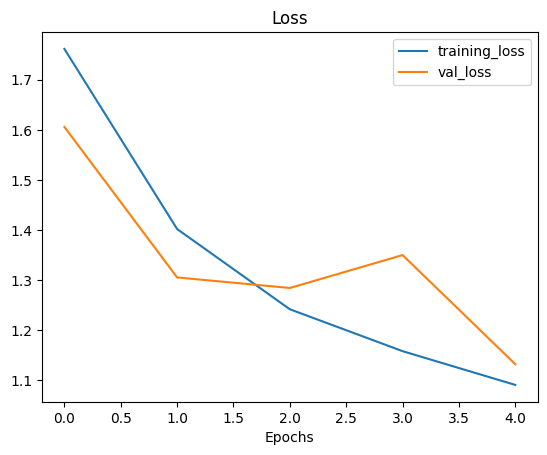

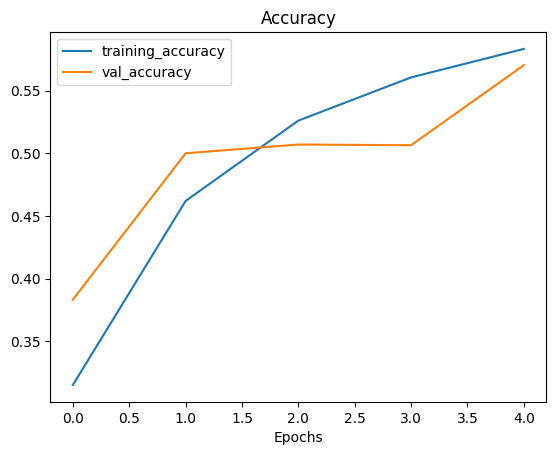

In [10]:
plot_loss_curves(history_1)

In [12]:
model_1.predict(test_data)

225/225 ━━━━━━━━━━━━━━━━━━━━ 85s 375ms/step


array([[3.0769125e-01, 1.3585160e-03, 8.4116951e-02, ..., 3.3713824e-01,
        2.0213751e-01, 6.2112096e-03],
       [4.4539563e-02, 9.1825280e-04, 1.8299733e-01, ..., 2.1664138e-01,
        5.3535354e-01, 1.9032302e-03],
       [1.5585360e-01, 1.0147552e-03, 2.9901443e-02, ..., 7.0572388e-01,
        1.0275905e-01, 1.9113795e-03],
       ...,
       [2.3119306e-02, 1.8268044e-04, 1.7430159e-01, ..., 2.7538100e-03,
        4.5628170e-03, 4.7151712e-01],
       [3.0047711e-02, 7.1916037e-04, 2.7854783e-02, ..., 5.8792606e-02,
        1.2910965e-02, 8.6146188e-01],
       [9.6755035e-02, 5.3128070e-04, 1.8929315e-01, ..., 9.8266758e-02,
        6.0112184e-01, 1.4984362e-03]], dtype=float32)

In [13]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [14]:
model_1_json = model_1.to_json()
with open("CNN2.json", "w") as json_file:  # Change the filename here
    json_file.write(model_1_json)

In [15]:
model_1.save_weights('CNN2.weights.h5')